This script explores the applications of Machine Learning for predicting Melt Pond Fraction on an Arctic Ice Pack through the summer.  Data are gathered from Worldview Sattellites with co-located WARM Buoys (BORG, Old Dominion University) (2018),  and SHEBA Ice Camp (1998).  2018 data was located several degrees south of SHEBA.  This data will thus test the models ability to predict Pond Fraction in different geographic locations.

In [95]:
#import packages for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
print(sys.version) #I am running Python 3.6

3.6.0 | packaged by conda-forge | (default, Feb  9 2017, 14:54:13) [MSC v.1900 64 bit (AMD64)]


In [9]:
#read in model input data
data = pd.read_csv('C:/Users/Austin/Desktop/OEAS895_Clayton/Project/Data/model_input.csv')
data.head() #visualize data

,Date,Date_Julian,DMP_NoWater,Surface_Irradiance,Below_Ice_Irradiance,Surface_Temp_C,Lat,Lon,Hrs_Above_Frz_Ice_Since_Jun1,Cum_Surface_Irradiance_SinceJun1,Cum_SubSurface_Irradiance_SinceJun1,Source,Split
0,1-Jun,152,0.001,62300000.0,814000.0,1.689247,72.844081,-166.537644,0,2.070000e+09,84000000.0,Buoy7,Train
1,4-Jun,155,0.005,65000000.0,1840000.0,3.694515,73.037055,-166.767810,24,2.260000e+09,88300000.0,Buoy7,Test
2,5-Jun,156,0.013,64300000.0,1450000.0,4.947612,72.844835,-163.319440,60,2.460000e+09,45700000.0,Buoy8,Train
3,5-Jun,156,0.017,58700000.0,2520000.0,5.777930,73.055408,-166.908423,41,2.320000e+09,90800000.0,Buoy7,Train
4,10-Jun,161,0.020,133000000.0,349000.0,-1.576667,76.865833,-165.986000,0,6.020000e+09,4410000.0,SHEBA,Train


Data to be used for machine learning shown above.  Descriptors of each variable can be found in the readme file.

In [67]:
#calculate r^2 values for relationships between Melt Pond Fraction and Environmental Variables
correlation_matrix = np.corrcoef(data.Date_Julian, data.DMP_NoWater) #calc correlation coefficient
correlation_xy = correlation_matrix[0,1] #grab the r value
r_squared = correlation_xy**2 #square r
print("r^2 date:",r_squared) #print results
correlation_matrix = np.corrcoef(data.Hrs_Above_Frz_Ice_Since_Jun1, data.DMP_NoWater) #repeat for each environmental (predictor) variable
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("r^2 temp:",r_squared)
correlation_matrix = np.corrcoef(data.Cum_Surface_Irradiance_SinceJun1, data.DMP_NoWater)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("r^2 surface PaR:",r_squared)
correlation_matrix = np.corrcoef(data.Cum_SubSurface_Irradiance_SinceJun1, data.DMP_NoWater)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("r^2 sub-surface PaR:",r_squared)
correlation_matrix = np.corrcoef(data.Lat, data.DMP_NoWater)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("r^2 Lat:",r_squared)
correlation_matrix = np.corrcoef(data.Lon, data.DMP_NoWater)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("r^2 Lon:",r_squared)

r^2 date: 0.6248558783721685
r^2 temp: 0.6667194738772458
r^2 surface PaR: 0.15345406908788636
r^2 sub-surface PaR: 0.3175965139903579
r^2 Lat: 0.038725710130489276
r^2 Lon: 0.0629383593519047


Above r^2 values show fair predictability with Date and Temp (cumulative hours above freezing at ice surface since June 1st).  Surface/Sub-Surface PAR (Irradiance, cumulative since June 1st) and Lat/Lon are poor predictors of Pond Fraction.  

In [76]:
#create new variables separating data by site for visualization
#this line of code drops any data tagged "SHEBA"
buoy=data[~data.Source.str.contains("SHEBA")] #buoy data (further south)
#this line of code drops any data tagged "Buoy"
sheba=data[~data.Source.str.contains("Buoy")] #sheba data (further north)

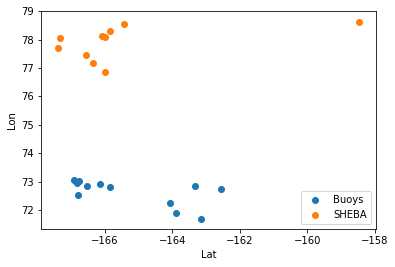

In [80]:
#Pond Fraction measurement locations
plt.scatter(buoy.Lon,buoy.Lat)
plt.scatter(sheba.Lon,sheba.Lat)
plt.legend(['Buoys','SHEBA'])
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.show()
#note that SHEBA data is further north than Buoy data

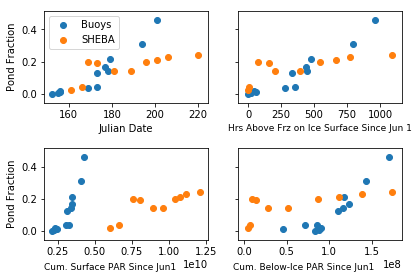

In [75]:
#perform multiple linear regressions to examine relationships
fig, axs = plt.subplots(2, 2, sharey=True, sharex=False)
axs[0, 0].scatter(buoy.Date_Julian, buoy.DMP_NoWater)
axs[0, 0].scatter(sheba.Date_Julian, sheba.DMP_NoWater)
axs[0, 0].legend(['Buoys','SHEBA'])
axs[0, 0].set_xlabel('Julian Date')
axs[0, 0].set_ylabel('Pond Fraction')
axs[0, 1].scatter(buoy.Hrs_Above_Frz_Ice_Since_Jun1, buoy.DMP_NoWater)
axs[0, 1].scatter(sheba.Hrs_Above_Frz_Ice_Since_Jun1, sheba.DMP_NoWater)
axs[0, 1].set_xlabel('Hrs Above Frz on Ice Surface Since Jun 1', fontsize=9)
axs[1, 0].scatter(buoy.Cum_Surface_Irradiance_SinceJun1, buoy.DMP_NoWater)
axs[1, 0].scatter(sheba.Cum_Surface_Irradiance_SinceJun1, sheba.DMP_NoWater)
axs[1, 0].set_xlabel('Cum. Surface PAR Since Jun1', fontsize=9)
axs[1, 0].xaxis.set_label_coords(0.4,-0.25)
axs[1, 0].set_ylabel('Pond Fraction')
axs[1, 1].scatter(buoy.Cum_SubSurface_Irradiance_SinceJun1, buoy.DMP_NoWater)
axs[1, 1].scatter(sheba.Cum_SubSurface_Irradiance_SinceJun1, sheba.DMP_NoWater)
axs[1, 1].set_xlabel('Cum. Below-Ice PAR Since Jun1', fontsize=9)
axs[1, 1].xaxis.set_label_coords(0.4,-0.25)
plt.tight_layout()
plt.show()

Note lower pond fraction values for SHEBA data points, as it is located further north.  Additionally, SHEBA data sees much more light at the surface (see bottom left, product of day length and less ice melt thus less cloud cover).  This indicates temperature is likely the primary driver of melt pond formation, which agrees with the previously calculated r^2 values.

First we will try a Random Forest machine learning model using the Leave One Out (LOO) sampling method. The algorithm uses n-1 (where n is total number of data points) data points to train the model, and then predicts the final data point.  This process is looped through, so that every data point is predicted.

In [81]:
#first we will define our target(y) and our predictor(x) variables
#I have chosen the 4 predictor variables below as they have given me the best results, but feel free to try other combinations
x = data[['Hrs_Above_Frz_Ice_Since_Jun1','Lat','Lon','Cum_Surface_Irradiance_SinceJun1']]
y = data['DMP_NoWater']
#from here foward we will be using ALL data (buoy and sheba)

In [82]:
#next we need to set aside some portion of data for validation(testing) later on
#we do this by performing a train/test split
#note that the "train" data will eventually be split again, and that the "test" data is for independent validation
from sklearn.model_selection import train_test_split
#test size sets % for testing --> 0.2 = 20% test, 80% train
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2, random_state=4)

In [83]:
#next we scale our predictor variables, since they are presented in varying orders of magnitude
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Austin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [84]:
#now we convert our training data to numpy arrays, as they seem to pass through the machine learning loop better
X_array = np.array(X_train) 
y_array = np.array(Y_train)

In [91]:
#import machine learning packages
from sklearn.model_selection import LeaveOneOut  
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
#define LeaveOneOut and create empty lists to hold results
loo = LeaveOneOut()
ytests = []
ypreds = []
rrs = []
mses = []
#this is a nested loop to loop through all combinations of LOO, n_estimators (n_range), and max_depth (d_range)
d_range = np.arange(1,16,1)
n_range = np.arange(100, 101, 1)
for d in d_range:
    for n in n_range:
        for train_idx, test_idx in loo.split(X_train):
            x_tr, x_te = X_array[train_idx], X_array[test_idx] #assign train and test data from our arrays
            y_tr, y_te = y_array[train_idx], y_array[test_idx]
            model = RandomForestRegressor(max_depth=d, n_estimators=n, random_state=4) #define model
            model.fit(X = x_tr, y = y_tr) #fit model
            y_pred = model.predict(x_te) #predict one data point left out 
        
            # there is only one y-test and y-pred per iteration over the loo.split, 
            # so to get a proper graph, we append them to respective lists.
        
            ytests += list(y_te)
            ypreds += list(y_pred)
        #calculate and print performance metrics for each complete LOO run for a given d and n
        rr = metrics.r2_score(ytests, ypreds)
        ms_error = metrics.mean_squared_error(ytests, ypreds)
        rmse = math.sqrt(ms_error) #calculate rmse
        print("max depth:",d," n_estimators:",n," r_squared:",rr," RMSE:",rmse)

max depth: 1  n_estimators: 100  r_squared: 0.26063561554295567  RMSE: 0.09846132638272753
max depth: 2  n_estimators: 100  r_squared: 0.3204124830296269  RMSE: 0.09439720056224188
max depth: 3  n_estimators: 100  r_squared: 0.3564377631082385  RMSE: 0.0918611112676584
max depth: 4  n_estimators: 100  r_squared: 0.37328779891731856  RMSE: 0.09065056045851734
max depth: 5  n_estimators: 100  r_squared: 0.3828886146830842  RMSE: 0.08995352736616195
max depth: 6  n_estimators: 100  r_squared: 0.389411654945536  RMSE: 0.08947684736442763
max depth: 7  n_estimators: 100  r_squared: 0.39406509825649616  RMSE: 0.08913523275405663
max depth: 8  n_estimators: 100  r_squared: 0.3975551807397164  RMSE: 0.08887816011823112
max depth: 9  n_estimators: 100  r_squared: 0.4002696893377764  RMSE: 0.08867769950731813
max depth: 10  n_estimators: 100  r_squared: 0.4024412962162247  RMSE: 0.08851700415760148
max depth: 11  n_estimators: 100  r_squared: 0.4042180654804095  RMSE: 0.08838530883248169
max dep

Not great results for training our model (explained further below).  We can see that increasing our max depth improves our predictability, but the r^2 plateaus around 0.4.  I have also fixed the numer of estimators here to 100 (default), as I found that increasing the max depth was the primary driver in raising r^2.  You can easily play with this by changing n_range if you want to see how n_estimators changes the results.  Let's move forward with a max_depth of 10, as this seems to be around where the model begins to reach peak performance.

In [92]:
#less than ideal r squared values from training the model, but lets test it on our validation data and see what happens
rf = RandomForestRegressor(max_depth=10, n_estimators=100) #define model (I have not set the random state here, in an effort to allow the model to behave truly random)
rf.fit(X_train,Y_train) #fit model
rf_pred = rf.predict(X_test) #predict values
r = metrics.r2_score(Y_test,rf_pred) #calculate r^2 for predicted and actual Pond Fraction values
mse = metrics.mean_squared_error(Y_test,rf_pred)
rmse = math.sqrt(ms_error) #calculate rmse
print(r)
print(rmse)

0.9127188742999031
0.08803315813042671


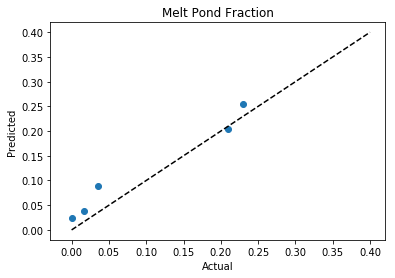

In [93]:
#and lets visualize these results
plt.scatter(Y_test,rf_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Melt Pond Fraction')
#this section just creates a 1:1 line
b = np.linspace(0,0.4,8)
a = b
plt.plot(a,b,'--', color='k')

plt.show()

Great results from our validation data! Despite low r^2 values from training, we get a high r^2 for our tested data. However, this is a product of the random state.  I had set the random state for the original train/test split and the random forest model to 4, because I had played around and figured out that it gave good results. In reality, you can  alter the random states to see that this high degree of predictability on the validation data is the exception, not the norm.  This all comes back to the small size of this data set (n=22). Setting aside 20% of our data for validation means we are training our model on 17 data points, and validating it on 5 data points.  Melt pond fraction clearly changes drastically as the summer progresses, and due to the temporal sparseness of this data set, leaving out certain points can result in large gaps in our training and test data. In fact, in the figure above you can see these reults don't include any points above ~0.25, meaning we have no idea how well this model predicts the higher values in our data. With a larger dataset, I believe the model built above would perform well, but for this small data set, lets explore some other options for predicting pond fraction.  (Note if you run this script that the final r^2 may change, as I did not set a random state when running our validation data- see comments).

Let's try manually assigning values to our training and testing datasets.  I've included this already in the .csv file 'Split' column (see data head at beginning of script).  I tried to be un-biased, with my only goal being to ensure that both training and testing data included values from the entire summer, representing the whole range of pond fraction values from both buoy and SHEBA data.  Feel free to play around with the string values in 'Split' and see how they impact the results below. (I have split the data into 14 train points and 8 test points, which is approximately a 65/35 split.  Again, this was in an effort to ensure that both testing and training data contained points spanning the entire summer from both platforms).

In [96]:
#split our dataset into testing and training data based on the strings in the 'Split' column of 'data'
test=data[~data.Split.str.contains("Train")] #drops train data
train=data[~data.Split.str.contains("Test")] #drops test data

In [105]:
#define our predictor variables (same as before)
x_train=train[['Hrs_Above_Frz_Ice_Since_Jun1','Lat','Lon','Cum_Surface_Irradiance_SinceJun1']] 
x_test=test[['Hrs_Above_Frz_Ice_Since_Jun1','Lat','Lon','Cum_Surface_Irradiance_SinceJun1']]
#define our target variables
y_train=train[['DMP_NoWater']]
y_test=test[['DMP_NoWater']]
y_train=np.ravel(y_train) #change array to vector- was getting errors before I did this
y_test=np.ravel(y_test)

In [98]:
#scale our data
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Austin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [101]:
#try the same random forest model as before (no random state)
regr = RandomForestRegressor(max_depth=10, n_estimators=100)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r = metrics.r2_score(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
print("R Squared:",r," RMSE:",rmse)

R Squared: 0.713431406518861  RMSE: 0.04937878491822169


C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


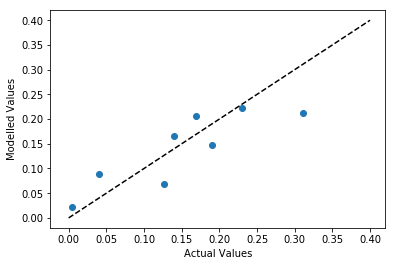

In [102]:
#and visualize these results
plt.scatter(y_test,y_pred)
b = np.linspace(0,0.4,8)
a = b
plt.plot(a,b,'--', color='k')
plt.xlabel('Actual Values')
plt.ylabel('Modelled Values')
plt.show()

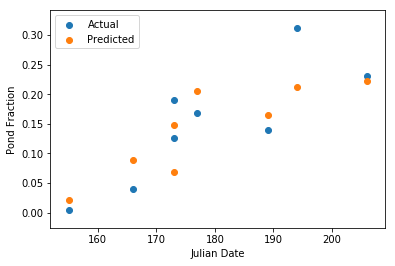

In [103]:
#lets also show the results as a function of time
plt.scatter(test.Date_Julian,y_test)
plt.scatter(test.Date_Julian,y_pred)
plt.legend(['Actual','Predicted'], loc='upper left')
plt.xlabel('Julian Date')
plt.ylabel('Pond Fraction')
plt.show()

Not bad- we have a lower r^2 than with the LeaveOneOut method, but this model should consistently give us decent results without being dependent on the random state.  The residuals about the 1:1 line appear normally distributed.  To see how these results compare to a different model (MLP Regressor instead of Random Forest), check out the MLP_Final script located in this same repository.  